In [77]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy import stats
import pandas as pd
import math

import my_lib_santanastasio as my

import rotolamento as rt

def FitValues(x, y, sd_y):
    
    w_y = np.power(sd_y.astype(float), -2) 
    y_mean = my.my_mean(y, w_y)
    x_mean = my.my_mean(x, w_y)
    x_2_mean = my.my_mean(x*x, w_y)
    xy_mean = my.my_mean(x*y, w_y)
    var_x = my.my_var(x, w_y)
    cov_xy = my.my_cov(x, y, w_y)
    
    print("x_mean: "+str(x_mean))
    print("y_mean: "+str(y_mean))
    print("x_2_mean: "+str(x_2_mean))
    print("xy_mean: "+str(xy_mean))
    print("var_x: "+str(var_x))
    print("cov_xy: "+str(cov_xy))
    print("w_y: "+str(sum(w_y)))

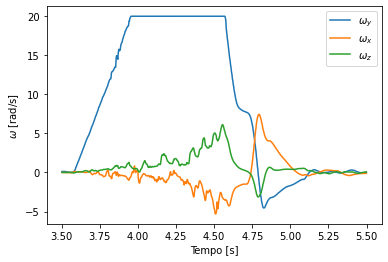

In [78]:
df = pd.read_csv('misure_2/Angolo25NEW/data_25deg_no_riposizionamento.csv')

data_time = df['Time (s)'].to_numpy()
data_y = df['Gyroscope y (rad/s)'].to_numpy()
data_x = df['Gyroscope x (rad/s)'].to_numpy()
data_z = df['Gyroscope z (rad/s)'].to_numpy()

#Plot dataset
s = rt.time_to_index(data_time,3.5)
f = rt.time_to_index(data_time,5.5)
plt.plot(data_time[s:f],data_y[s:f],label="$\omega_y$")
plt.plot(data_time[s:f],data_x[s:f],label="$\omega_x$")
plt.plot(data_time[s:f],data_z[s:f],label="$\omega_z$")
plt.xlabel("Tempo [s]")
plt.ylabel("$\omega$ [rad/s]")
plt.legend()

plt.savefig("no_riposizionamento.png")

In [79]:
intervals,indexes = rt.get_intervals(data_time,data_y,5,18)
intervals


[[3.685420197, 3.915568955],
 [9.439699902000001, 9.679858621000001],
 [14.68406212, 14.92422314],
 [19.97126984, 20.21143129],
 [24.00921856, 24.24938141],
 [26.75911255, 26.999276],
 [30.52727258, 30.76743744],
 [33.42134306, 33.66150731],
 [35.6305047, 35.87066465],
 [39.98783979, 40.22800025],
 [44.82416455, 45.06432724],
 [55.98568792, 56.21584361],
 [59.38478352, 59.62493877],
 [61.83619714, 62.07635793],
 [66.45241229, 66.6856584],
 [69.23970876, 69.47986725],
 [73.44400623, 73.67416458],
 [78.10692919, 78.32707618],
 [82.45029873, 82.68045039],
 [86.23922026, 86.46939661]]

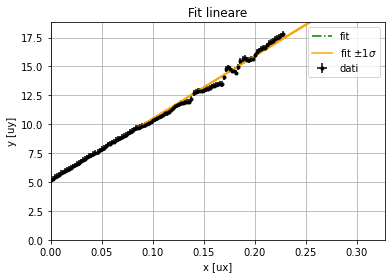

In [80]:
res = rt.m_from_fit(data_time,data_y,3.685420197,3.915568955,save_fig="fit-no-riposizionamento.png")

In [81]:
print(res)
print(data_y[s:f])

(54.19404282278132, 0.32805143911072826)
[ 1.30223036e-01  1.24114379e-01  1.27168715e-01  1.27168715e-01
  1.23503514e-01  1.24725245e-01  1.29001290e-01  1.29612163e-01
  1.32055640e-01  1.30223036e-01  1.29001290e-01  1.22281782e-01
  1.12507939e-01  1.03955828e-01  9.47928503e-02  8.25755373e-02
  7.70777538e-02  6.11952580e-02  4.95888181e-02  4.53127623e-02
  4.40910310e-02  3.73715125e-02  3.79823782e-02  2.69868057e-02
  3.12628597e-02  2.94302646e-02  3.12628597e-02  2.82085370e-02
  1.72129609e-02  1.47695001e-02  8.66084732e-03 -1.11299648e-03
 -1.08868405e-02  1.08734013e-04  3.73715125e-02  3.67606469e-02
  4.59236242e-02  5.44757433e-02  5.87517954e-02  1.02734096e-01
  1.69929281e-01  2.07802921e-01  2.85993695e-01  3.87397319e-01
  4.41764325e-01  5.62104762e-01  6.93440795e-01  7.56359935e-01
  8.74256909e-01  9.97651696e-01  1.05751646e+00  1.17968953e+00
  1.29453218e+00  1.35806215e+00  1.46801794e+00  1.52605021e+00
  1.65494263e+00  1.77039623e+00  1.83209360e+00 

In [82]:
s= 1690 # index start
f= 1805 # index finish



x = data_time[s:f]-data_time[s]
ux = 0.0001
y = data_y[s:f]
uy = np.array([ 0.001 for i in y])

m         =  54.194
sigma(m)  =  0.0014
c         =  5.0609
sigma(c)  =  0.0002
cov(m, c) =  -0.0
rho(m, c) =  -0.8641


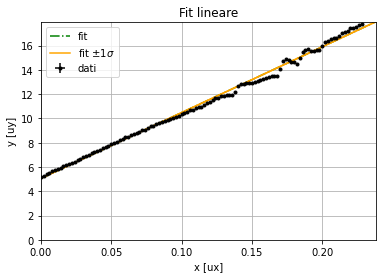

In [83]:
m0, sm0, c0, sc0, cov0, rho0 = my.lin_fit(x, y, uy, "x [ux]", "y [uy]", 0, x.max()+0.01, 0, y.max()+0.1, plot=True, setrange=True)

m         =  54.194
sigma(m)  =  0.0077
c         =  5.0609
sigma(c)  =  0.001
cov(m, c) =  -0.0
rho(m, c) =  -0.8641


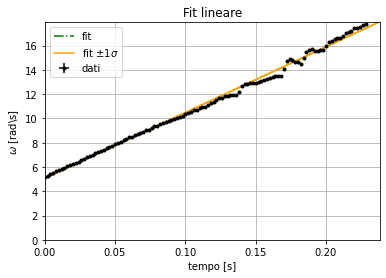

In [84]:
# nuove y
uy_new = np.sqrt(uy**2+(m0*ux)**2)
m, sm, c, sc, cov, rho = my.lin_fit(x, y, uy_new, "tempo [s]", "$\omega$ [rad\s]", 0,x.max()+0.01, 0, y.max()+0.1, plot=True, setrange=True)
plt.savefig("fit-new-y.png")

In [85]:
# Studio dei residui
y_atteso = m*x + c
d = y - y_atteso
d_norm = d / uy_new

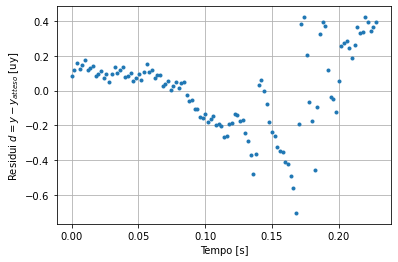

In [86]:
plt.errorbar(x,d,uy_new,marker='.',linestyle="")
plt.ylabel("Residui $d=y-y_{atteso}$ [uy]")
plt.xlabel("Tempo [s]")
plt.grid()
plt.savefig("residui.png")

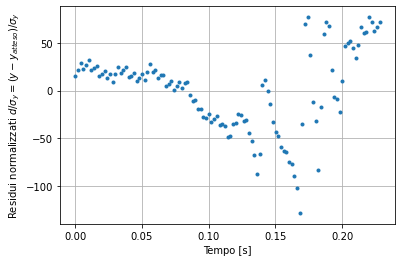

In [87]:
plt.errorbar(x,d_norm,uy_new/uy_new,marker='.',linestyle="")
plt.ylabel("Residui normalizzati $d/\sigma_y=(y-y_{atteso})/\sigma_y$")
plt.xlabel("Tempo [s]")
plt.grid()
plt.savefig("residui-norm.png")

0.2337232505860986
m         =  54.194
sigma(m)  =  0.3281
c         =  5.0609
sigma(c)  =  0.0433
cov(m, c) =  -0.0123
rho(m, c) =  -0.8641


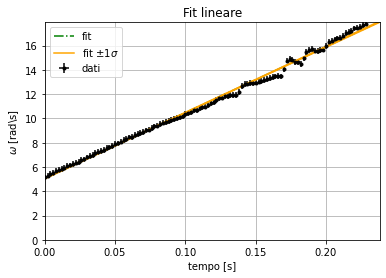

In [88]:
# Incertezze a posteriori
sigmy_post = math.sqrt( np.sum(d**2)/(d.size-2) )
uy_post = np.repeat(sigmy_post,y.size)
print (sigmy_post)

# Nuovo fit con incertezze a posteriori sulle y
m1, sm1, c1, sc1, cov1, rho1 = my.lin_fit(x, y, uy_post, "tempo [s]", "$\omega$ [rad\s]",0, x.max()+0.01, 0, y.max()+0.1, plot=True, setrange=True)
plt.savefig("fit-incertezze-post.png")

In [89]:
rt.chi2(x,y,uy,m,c)



chi2 misurato:  6172801.03869
ndf:  113
chi2 mis./ndf:  54626.55786


p_value=0.0 < 0.05
Test del Chi2 al livello di significatività alpha=0.05 non superato





In [90]:
FitValues(x,y,uy)

x_mean: 0.11407591848695653
y_mean: 11.243110171704346
x_2_mean: 0.017427211224624005
xy_mean: 1.5217749908184306
var_x: 0.004413896045981254
cov_xy: 0.23920687133121366
w_y: 115000000.0
